<a href="https://colab.research.google.com/github/mvmarcio/Estudos_Flai/blob/main/Aula1_MQO_Fund_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## **Importação dos Dados**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'

dados = pd.read_csv(url)

In [ ]:
# Lendo as primeiras 5 linhas

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Lendo as últimas 5 linhas:

dados.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Vendo as estísticas descritivas dos dados

dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Estatísitcas Descritivas Básicas**

In [ ]:
# Vendo o número de linhas e colunas:

dados.shape

(1338, 7)

In [ ]:
# Instalando o sweetviz, lib automática para estatística descritiva

!pip install sweetviz

In [ ]:
# Importando o sweetviz

import sweetviz

In [ ]:
eda = sweetviz.analyze([dados, "Seguro Saúde"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
eda = sweetviz.analyze([dados, "Seguro Saúde"],
                       target_feat = "charges")

eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## **Algum pré-processamento interessante antes de prosseguir**

*  Transformar a variável smoker em 0 (não) ou 1 (sim);

*  Colocar a variável resposta na escala para cada mil dólares.

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


# **Gráficos pertinentes**

In [ ]:
# Importando a biblioteca seaborn

import seaborn as sns

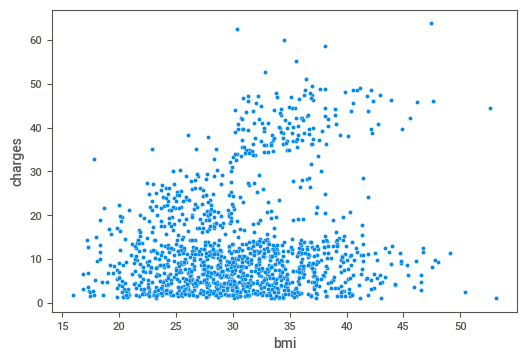

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados,
                legend = 'auto')

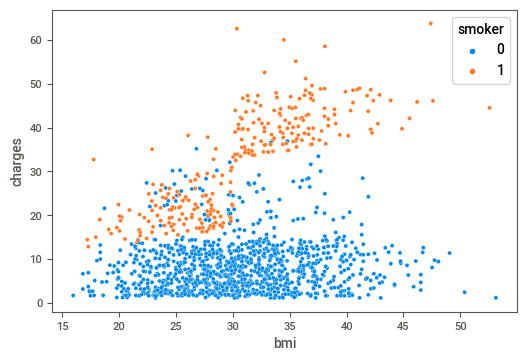

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

## **Cenário 1: considerando apenas a variável bmi.**

In [ ]:
X = dados['bmi'].values.reshape(-1,1) #transforma os dados num array
y = dados['charges']

## **Preparação para a validação do tipo Holdout**

Vamos dividir o conjunto de dados numa amostra para treino, para treinar o modelo, e outra para teste, para avaliar o modelo.

In [ ]:
# Holdout
# Separando em dados de teste e treinamento
# Vamos utilizar o a biblioteca do Scikit Learn ()

from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.26)

In [ ]:
# Visualizando as duas amostras

print(Xtreino.shape)
print(Xteste.shape)

(990, 1)
(348, 1)


In [ ]:
# Ajusta do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição utilizando a amostra de teste
preditos = reg.predict(Xteste)
preditos

In [ ]:
# Importando a o numpy para trabalhar com os vetores do modelo

import numpy as np

# Testando os resíduos do modelo de teste:
round(np.mean((preditos - yteste)**2), ndigits=2)

243.72

In [ ]:
# Erro quadrádico Médio

from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 138.98


In [ ]:
# Gerando os coeficientes do modelo

b0 = reg.intercept_
b1 = reg.coef_
print('Intercetpo: \n', b0)
print('Beta1: \n', b1)

Intercetpo: 
 0.7327644661621147
Beta1: 
 [0.40643105]


Nesse cenário, o modelo de regressão linear é dado por:

$\hat{custos} = \hat{\beta_0} + \hat{\beta_1}*IMC$

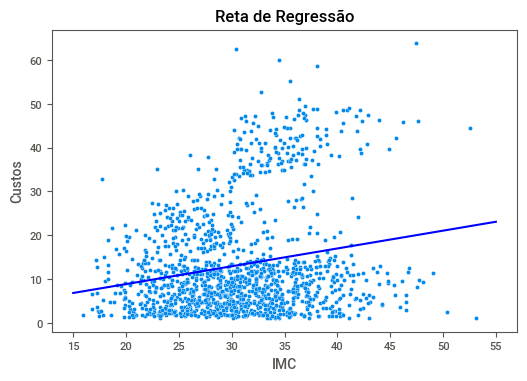

In [ ]:
# Agora vamos visualizar a reta da regressão

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt


sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustássemos e avaliássemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [ ]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM: {}'.format(round(eqm, 2)))

EQM: 140.78


## **Cenário 2: Considerando a Variável BMI e Smoker**

In [ ]:
# Criandos os vetores das variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 2)))

EQM: 50.3


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n', reg.intercept_)
print('Beta1: \n', reg.coef_)

Intercepto: 
 -4.576800654864789
Beta1: 
 [ 0.42197548 23.63000643]


In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

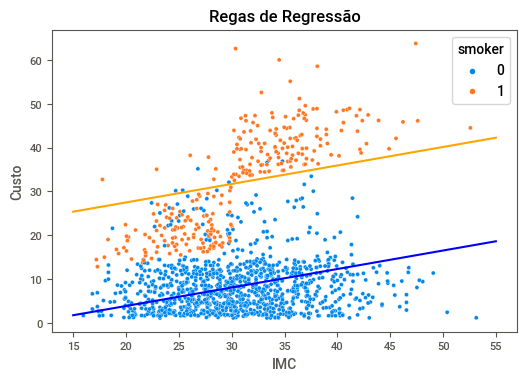

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Regas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

Faça repetições da técnica Holdout, variando a distribuição de quem vai para a amsotra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter um valor mais estável para o EQM.

In [ ]:
# Repetições da técnica Holdout:

R = 100
eqms = []

for i in range(R):
  Xtreino, Xteste, ytreino, yteste, = train_test_split(X, y, test_size = 0.25)
  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)
  preditos = reg.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)

In [ ]:
np.mean(eqms)

50.372886969369304

In [ ]:
np.median(eqms)

49.96432169958507

In [ ]:
np.std(eqms)

4.526119355839978

In [ ]:
round(np.std(eqms)/np.mean(eqms), 2)*100

9.0

In [ ]:
import pandas as pd

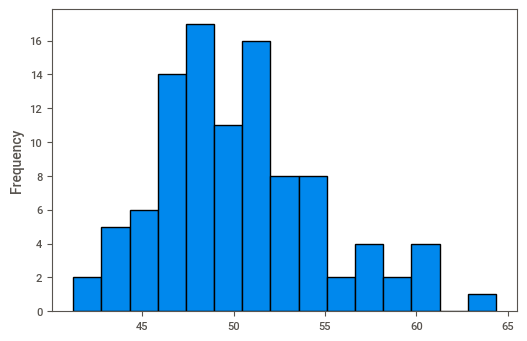

In [ ]:
# Montando série do eqm

pd.Series(eqms).plot(kind = 'hist', bins = 15, edgecolor = 'black')

No Holdout abaixo eu fiz algumas alterações. Vou utilizar o do professor para teste dos modelos.

In [ ]:
# Criando uma função auxiliar para o Holdout repetido: 

def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms_treino = []
  eqms_teste = []

  for i in range(replicas):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = proporcao)

    #Treinando o modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)

    #Verificando o eqm no teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos_teste)

    #Guardando o resultado
    eqms_treino.append(eqm_treino)
    eqms_teste.append(eqms_teste)

  res_treino = np.array(eqms_treino).mean().round(2)
  res_teste = np.array(eqms_teste).mean().round(2)
  var_treino = np.array(eqms_treino).std().round(2)
  var_teste = np.array(eqms_teste).std().round(2)
  disp_treino = (np.array(eqms_treino).std().round(2))/(np.array(eqms_treino).mean().round(2))
  disp_teste = (np.array(eqms_teste).std().round(2))/(np.array(eqms_teste).mean().round(2))

  print('EQM médio de treino: {}'.format(res_treino))
  print('EQM médio de teste: {}'.format(res_teste))
  print('Variabilidade do EQM treino {}'.format(var_treino))
  print('Variabiliade do EQM teste {}'.format(var_teste))
  print('Dispersão do EQM treino: {}'.format(disp_treino))
  print('Dispersão do EQM teste: {}').format(disp_teste)

  return res_treino, res_teste, var_treino, var_teste, disp_treino, disp_teste

In [ ]:
# Código original do Ricardo:

def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
        
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)
    var_treino = np.array(eqms_treino).std().round(2)
    var_teste = np.array(eqms_teste).std().round(2)
    
    print(40*'=')
    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))
    print('Variabilidade do EQM treino: {}'.format(var_treino))
    print('Variabiliade do EQM teste: {}'.format(var_teste))
    print(40*'=', '\n')

    return res_treino, res_teste, var_treino, var_teste

In [ ]:
# Código do Ricardo sem alterações.

def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste

# **Outros Modelos de Regressão**

## **K-vizinhos mais próximos (K-nearest neighbors)**

In [ ]:
# Importando o modelo na biblioteca sklearn

from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 100)
knnreg.fit(Xtreino, ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='uniform')

In [ ]:
# HoldoutRep(replicas = 100)

preditos_teste = reg.predict(Xteste)

In [ ]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrádico Médio do Treino foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrádico Médio do Teste foi: {:.2f}'.format(eqm_teste))

O Erro Quadrádico Médio do Treino foi: 117.69
O Erro Quadrádico Médio do Teste foi: 99.86


In [ ]:
# Holdout repetido:
HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 50), replicas = 100)

EQM médio de TREINO: 85.79
EQM médio de TESTE: 88.89


(85.79, 88.89)

In [ ]:
# Plotando a solução: verificar o código, não funcionou

k = 100
knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))


plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

ValueError: ignored

# **Árvores de Regressão**

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Treinando o modelo
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor()
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio no Treino foi de: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio no Teste foi de: {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio no Treino foi de: 66.45
O Erro Quadrático Médio no Teste foi de: 290.18


In [ ]:
?DecisionTreeRegressor

O resultado pelo holdout é dado por:

In [ ]:
HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 2, min_samples_split = 200), replicas = 100)

[Text(497.2916666666667, 543.6, 'X[0] <= 30.17\nsamples = 1003\nvalue = 13.283'),
 Text(180.83333333333334, 422.8, 'X[0] <= 22.36\nsamples = 492\nvalue = 10.766'),
 Text(90.41666666666667, 302.0, 'samples = 83\nvalue = 8.532'),
 Text(271.25, 302.0, 'X[0] <= 28.695\nsamples = 409\nvalue = 11.22'),
 Text(180.83333333333334, 181.2, 'X[0] <= 27.73\nsamples = 315\nvalue = 11.732'),
 Text(90.41666666666667, 60.39999999999998, 'samples = 252\nvalue = 11.226'),
 Text(271.25, 60.39999999999998, 'samples = 63\nvalue = 13.758'),
 Text(361.6666666666667, 181.2, 'samples = 94\nvalue = 9.502'),
 Text(813.75, 422.8, 'X[0] <= 41.635\nsamples = 511\nvalue = 15.706'),
 Text(723.3333333333334, 302.0, 'X[0] <= 34.102\nsamples = 474\nvalue = 15.256'),
 Text(542.5, 181.2, 'X[0] <= 30.38\nsamples = 239\nvalue = 13.993'),
 Text(452.08333333333337, 60.39999999999998, 'samples = 12\nvalue = 19.853'),
 Text(632.9166666666667, 60.39999999999998, 'samples = 227\nvalue = 13.684'),
 Text(904.1666666666667, 181.2, 'X

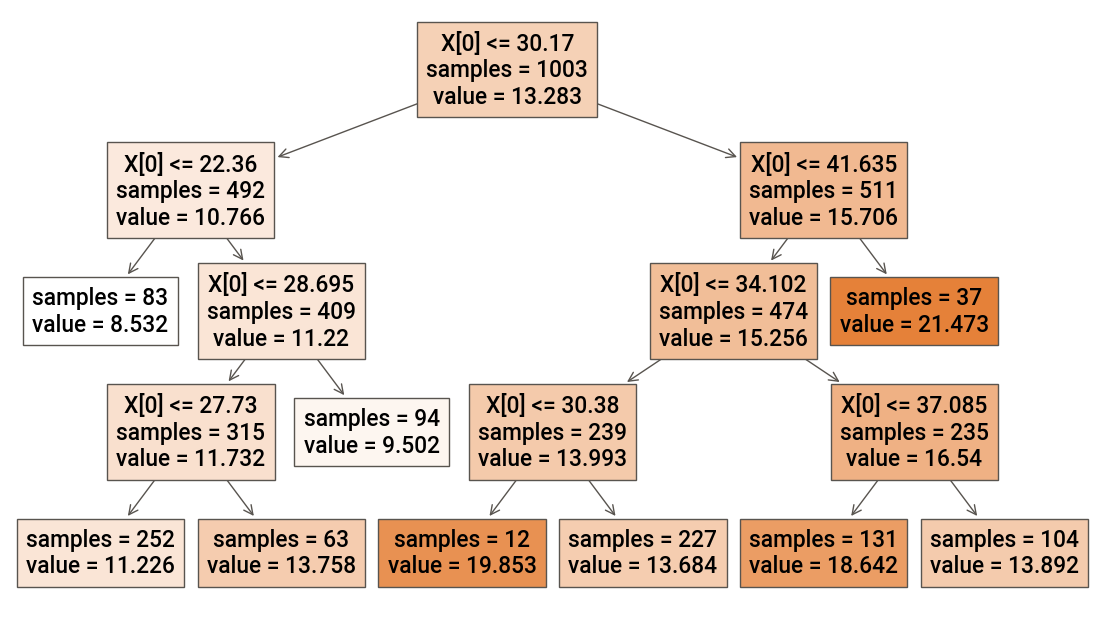

In [ ]:
# Planto os ramos da árvore de decisão:

from sklearn.tree import plot_tree

arvore = DecisionTreeRegressor(max_depth = 4, min_samples_split = 200)
arvore.fit(Xtreino, ytreino)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled = True, proportion = False, impurity = False)

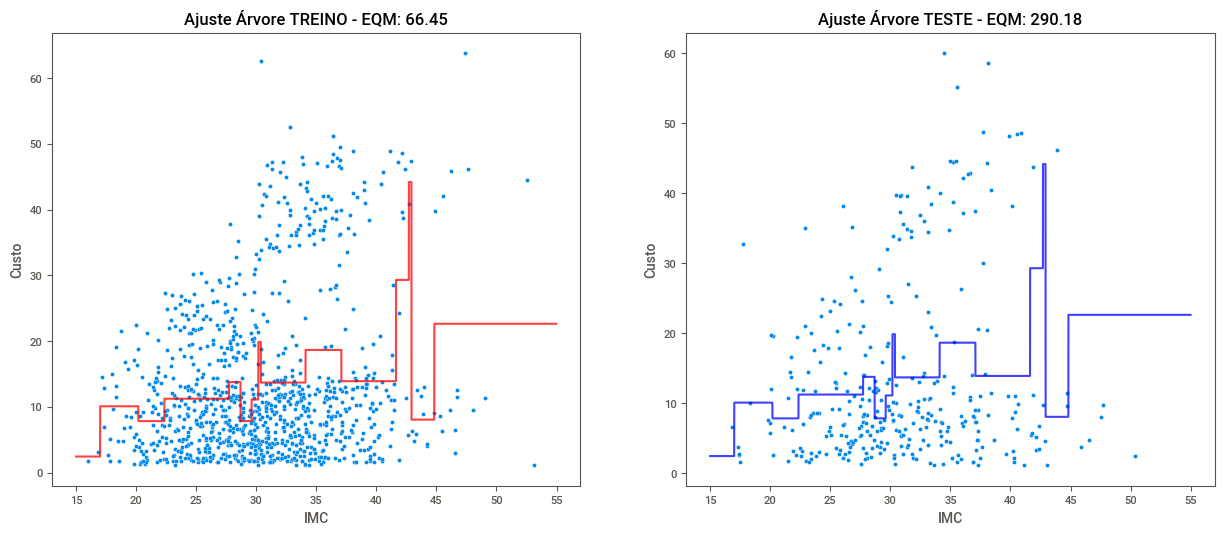

In [ ]:
# Gráficos dos ajustes:

profundidade = 4
arvore = DecisionTreeRegressor(max_depth = profundidade, min_samples_split = 5)
arvore.fit(Xtreino, ytreino)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = arvore.predict(x.reshape(-1, 1))

plt.figure(figsize = (15, 6))

# Treino
plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

# Teste
plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

# **Exemplo**

Comparação de modelos levando em conta a regressão linear, quatro cenários de árvores e quatro cenários KNN. Os resultados finais foram resumidos em uma tabela. 

In [ ]:
r = 1000
reglin = HoldoutRep(modelo = LinearRegression(), replicas = r)
arvore1 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 1), replicas = r)
arvore3 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 3), replicas = r)
arvore5 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 5), replicas = r)
arvore7 = HoldoutRep(modelo = DecisionTreeRegressor(max_depth = 7), replicas = r)
knn1 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 1), replicas = r)
knn10 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 10), replicas = r)
knn30 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 30), replicas = r)
knn90 = HoldoutRep(modelo = KNeighborsRegressor(n_neighbors = 90), replicas = r)

EQM médio de TREINO: 140.57
EQM médio de TESTE: 141.69
EQM médio de TREINO: 140.2
EQM médio de TESTE: 142.27
EQM médio de TREINO: 136.25
EQM médio de TESTE: 146.33
EQM médio de TREINO: 129.25
EQM médio de TESTE: 154.78
EQM médio de TREINO: 118.78
EQM médio de TESTE: 168.75
EQM médio de TREINO: 145.66
EQM médio de TESTE: 289.84
EQM médio de TREINO: 128.1
EQM médio de TESTE: 155.14
EQM médio de TREINO: 135.56
EQM médio de TESTE: 144.7
EQM médio de TREINO: 138.84
EQM médio de TESTE: 141.43


In [ ]:
modelos = [reglin, arvore1, arvore3, arvore5, arvore7, knn1, knn10, knn30, knn90]

nomes = ['Reg. Linear', 'Arvore (prof = 1)', 'Arvore (prof = 3)', 'Arvore (prof = 5)', 'Arvore (prof = 7)',
         'KNN (k = 1)', 'KNN (K = 10)', 'KNN (K = 30)', 'KNN (K = 90)']

In [ ]:
resultados = pd.DataFrame(modelos, index = nomes, columns = ['EQM Treino', 'EQM Teste'])
resultados

,EQM Treino,EQM Teste
Reg. Linear,140.57,141.69
Arvore (prof = 1),140.20,142.27
Arvore (prof = 3),136.25,146.33
Arvore (prof = 5),129.25,154.78
Arvore (prof = 7),118.78,168.75
KNN (k = 1),145.66,289.84
KNN (K = 10),128.10,155.14
KNN (K = 30),135.56,144.70
KNN (K = 90),138.84,141.43


In [ ]:
# Classificando os melhores modelos no conjunto de teste:

resultados.sort_values(by = 'EQM Teste')

,EQM Treino,EQM Teste
KNN (K = 90),138.84,141.43
Reg. Linear,140.57,141.69
Arvore (prof = 1),140.20,142.27
KNN (K = 30),135.56,144.70
Arvore (prof = 3),136.25,146.33
Arvore (prof = 5),129.25,154.78
KNN (K = 10),128.10,155.14
Arvore (prof = 7),118.78,168.75
KNN (k = 1),145.66,289.84


# **Gráficos de Ajuste com duas Variáveis**

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

## **Regressão Lineear**

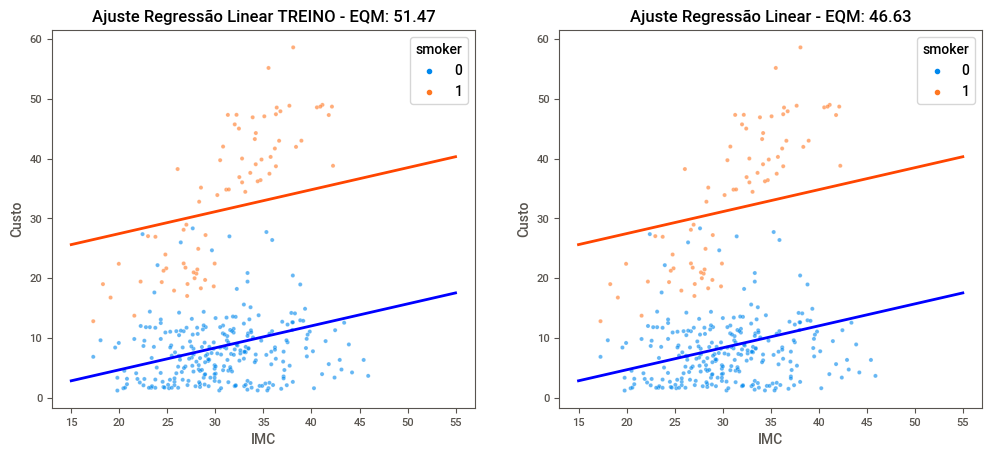

In [ ]:
# Plotando gráfico da regressão múltipla

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

modelo = LinearRegression()
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

# Primeiro gráfico
plt.subplot(1, 2, 1)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

# Segundo gráfico:
plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Regressão Linear - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

# **KNN**

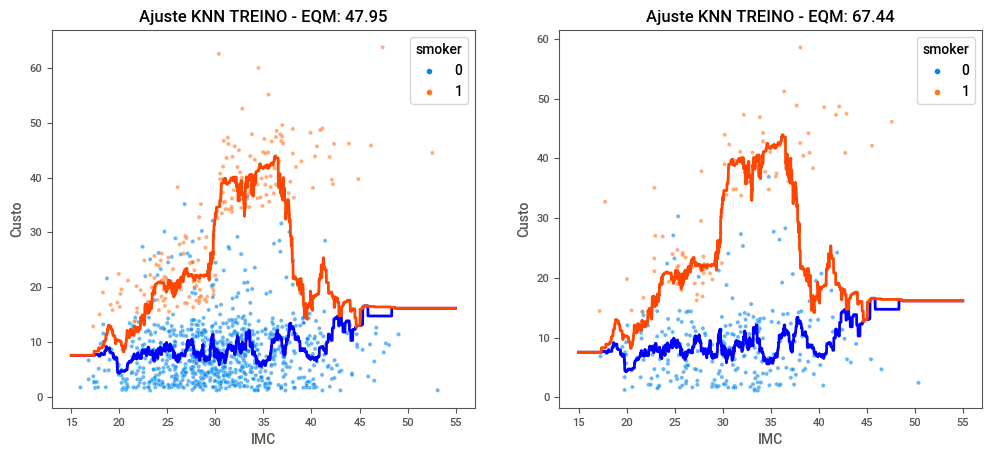

In [ ]:
# Plotando o gráfico da regressão múltipla do algoritmo KNN

Xtreino, Xteste, ytreino, yteste, = train_test_split(X, y, test_size = 0.25)

k = 20
modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

# Primeiro gráfico
plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

# **Árvore de Decisão**

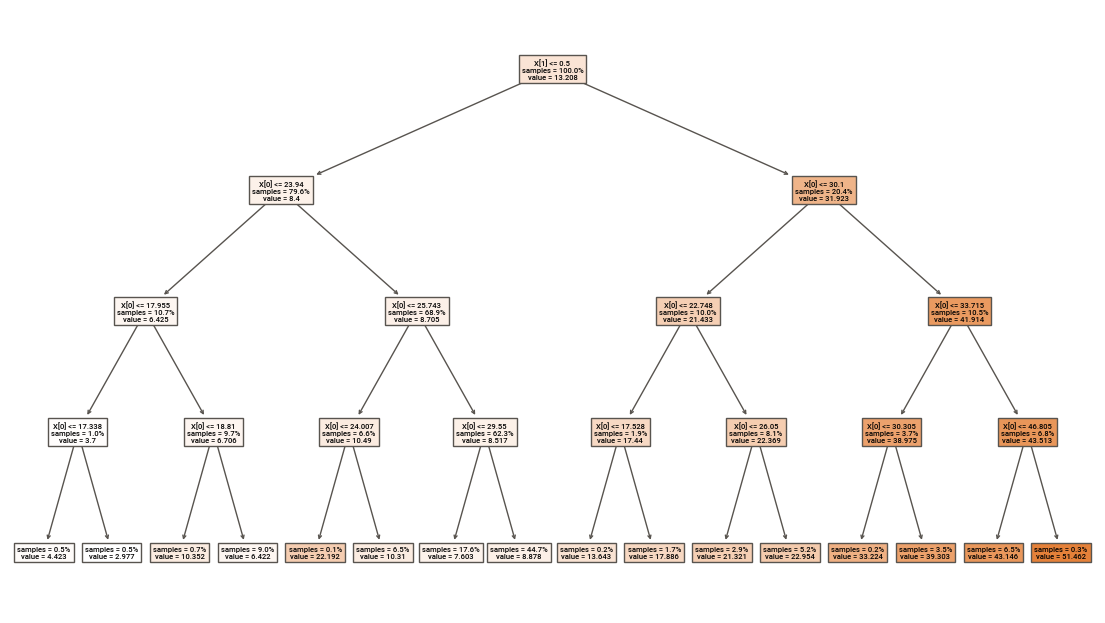

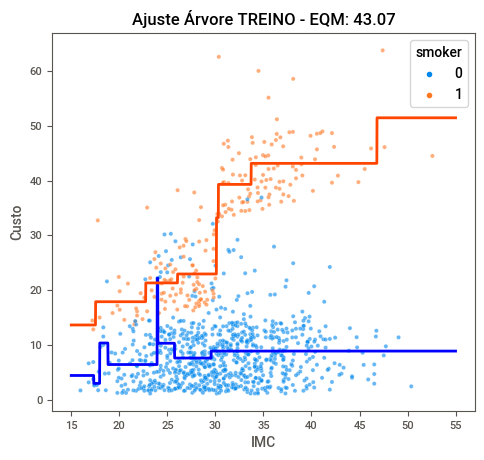

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

profundidade = 4 # número de nós
modelo = DecisionTreeRegressor(max_depth = profundidade)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled = True, proportion = True, impurity = False)
plt.show()

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()